# scRNAseq
 Transcript levels (CPM+1) per transcript-positive cell is shown for the same classes of inducible genes at 0, 2 and 8h after LPS activation. Boxes show upper and lower quartiles and whiskers show 1.5 of the interquartile range. Numbers represent adjusted P-values for 0h versus 2h and 0h versus 8h. Wilcoxon signed rank test with Bonferroni correction for multiple testing. One experiment with 682 cells.

In [1]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end
using SingleCellExperiment
using GeneSets
using Seaborn
using PyPlot
using PyCall
using Statistics
using NoLongerProblems_Pandas
import Pandas
using MultipleTesting
using HypothesisTests 
using DataFrames
using CSV
using ProgressMeter
using PrettyPlotting
using ScikitLearn
@sk_import linear_model: LogisticRegression

include("../Databases/Cuartero2018.jl")
include("../Databases/Bhatt2012.jl")
include("../Databases/MF_SingleCell.jl")
include("../Code/Load_scRNAseqData.jl")

sce = SingleCellExperiment.get_cells_with_this_characteristics(["WT"], :Genotype, sce)
sce = SingleCellExperiment.fit_mu_std_alpha(sce, splitdataby = :Sample, assay = "lnCPMplus1")
sce = SingleCellExperiment.fit_single_cell_logistic_regression(sce, assay = "lnCPMplus1")
bhattgenes = Bhatt2012.inducible_genes_figure3()[!,:GeneSymbol];
sce = SingleCellExperiment.Shalek2014_module_score(collect(bhattgenes), sce,fitparameter = "mu", modulescore_name = :BhattGenesScore, untreated_pattern = "UT",comparedtothissample = "WT", assay = "CPM")
bhattgenes= DataFrames.DataFrame(
    "GeneID" => Bhatt2012.inducible_genes_figure3()[!,:GeneSymbol], 
    "Class"=>Bhatt2012.inducible_genes_figure3()[!,:Class]
    );
sceBhatt = innerjoin(sce.rowData, bhattgenes,on = :GeneID)

col_colors_dict = Dict(
    "WT_UT" => "#f0f0f0",
    "WT_2H" => "#bdbdbd",
    "WT_8H" => "#636363",
    "RAD21_UT" => "#fee0d2",
    "RAD21_2H" => "#fc9272",
    "RAD21_8H" => "#de2d26",
    "RAD21" => "red",
    "WT" => "darkgrey",
    "0" => "#deebf7",
    "2" => "#9ecae1",
    "8" => "#3182bd",
    ) 


Progress: 100%|█████████████████████████████████████████| Time: 0:00:18


Dict{String, String} with 11 entries:
  "2"        => "#9ecae1"
  "WT"       => "darkgrey"
  "RAD21_2H" => "#fc9272"
  "8"        => "#3182bd"
  "RAD21_UT" => "#fee0d2"
  "RAD21_8H" => "#de2d26"
  "0"        => "#deebf7"
  "WT_UT"    => "#f0f0f0"
  "RAD21"    => "red"
  "WT_8H"    => "#636363"
  "WT_2H"    => "#bdbdbd"

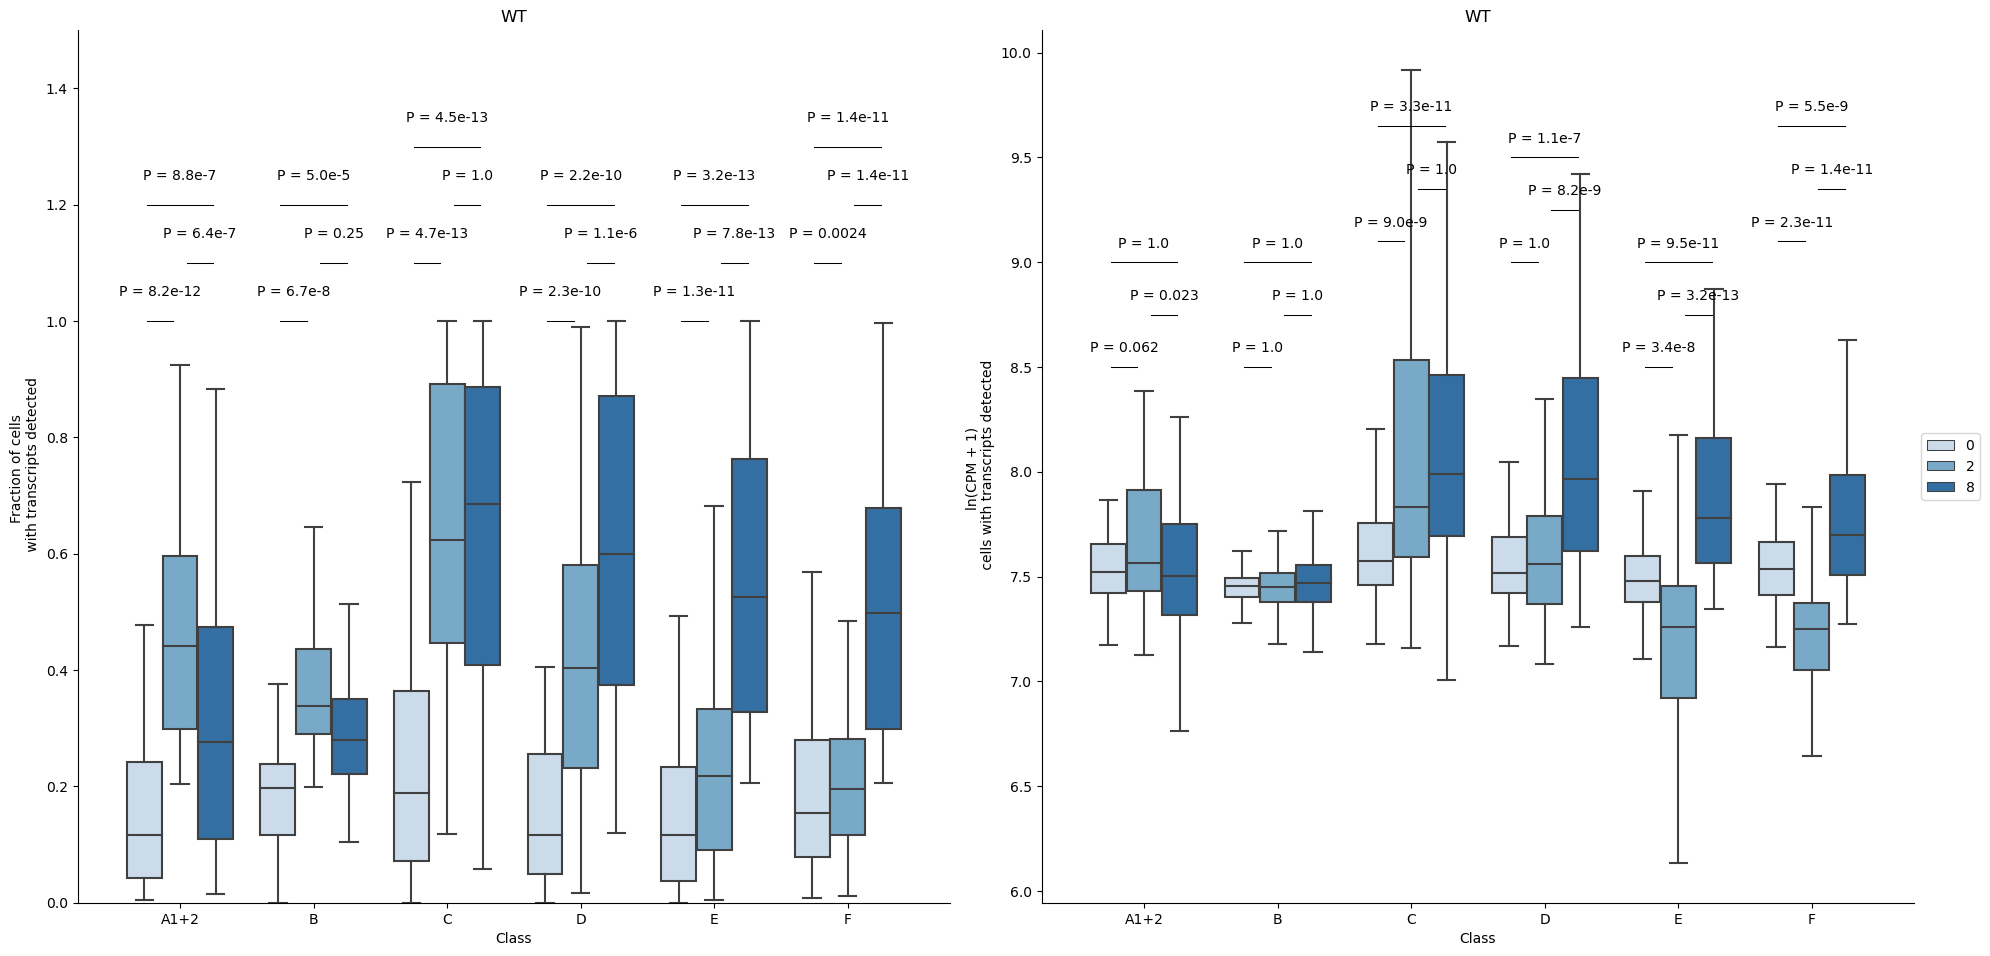

Percent 20.0%
Total genes considered 356


"../SourceData/Figure1f_boxplot.csv"

In [2]:
alpha = 0.2
include("adjust_alpha.jl")
include("figureclass.jl")
CSV.write("../SourceData/Fig1f_boxplot.csv",sceBhatt[!, ["GeneID",
 "TotalCounts",
 "TotalCells",
 "FractionCells",
 "WT_UT__mu",
 "WT_UT__alpha",
 "WT_2H__mu",
 "WT_2H__alpha",
 "WT_8H__mu",
 "WT_8H__alpha",
 "Class"]])

In [3]:
import Pkg
Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [7e6ae17a] BioSequences v2.0.5
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [c2308a5c] FASTX v1.2.0
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [96684042] InformationMeasures v0.3.1
  [10e44e05] MATLAB v0.8.2
  [f8716d33] MultipleTesting v0.5.0
  [92933f4c] ProgressMeter v1.7.1
  [438e738f] PyCall v1.92.5
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
